### Determining Hit Percentages for the Onset of the Feb 2021 CAO for the Northern Region


In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, date, timedelta
from itertools import chain

Importing in era-i, era-5, and S2S model data that's been averaged over a lat-lon. All data is at 00Z and 1000hPa

In [2]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/north_erai_t_llmn.nc")
stdvt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/north_erai_stdvt_llmn.nc")
rt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/north_era5_llmn.nc")
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ecmwf_llmn_north.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/eccc_llmn_north.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ukmo_llmn_north.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cma_llmn_north.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/jma_llmn_north.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cnr_llmn_north.nc")

In [3]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [4]:
#Creating data array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

Following cell is making the climo (era-i) data's coordinates match the model data

In [5]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=('number', n1))
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2))
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3))
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4))
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5))
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6))

#Giving climo data forecast days and steps
ct1_match = ct1_match.sel(time=doy1)
ct2_match = ct2_match.sel(time=doy2)
ct3_match = ct3_match.sel(time=doy3)
ct4_match = ct4_match.sel(time=doy4)
ct5_match = ct5_match.sel(time=doy5)
ct6_match = ct6_match.sel(time=doy6)
ct_rt_match = ct_llmn_ds.sel(time=rt_time)
stdvt_match = stdvt_llmn_ds.sel(time=rt_time)

Calculating the temperature anomalies for the model data and the era-5 data

In [6]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [7]:
#Era-5 data is weird so, I'm making the actual anomalies back into xarray
anom_rt_ds = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"),)

Below are a couple of plots where I'm just playing with the data.

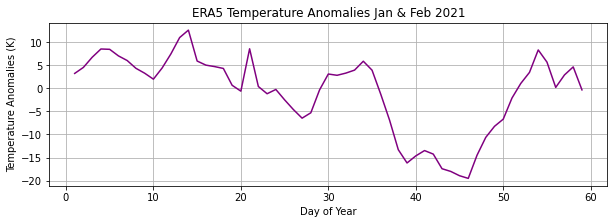

In [8]:
#Plotting the actual temperature anomalies
anom_rt_ds.plot(color='purple')
plt.grid(True)
plt.title('ERA5 Temperature Anomalies Jan & Feb 2021')
plt.xlabel('Day of Year')
plt.ylabel('Temperature Anomalies (K)')
fig = mlp.pyplot.gcf()
fig.set_size_inches(10, 3)

Determining the onset and length of the CAO which was determined to be Feb 7th-19th

In [9]:
time_of_CAO = anom_rt_ds < -.75* stdvt_match
time_of_CAO #<--From this, it's determined that the CAO begins on Feb 6th and lasts until Feb 19th

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 55.0 56.0 57.0 58.0 59.0
    hour     float64 ...
    lev      int32 ...
    level    int32 ...
Data variables:
    t        (time) bool False False False False ... False False False False

Creating date variable in order to select the day I want (February 6th)

In [10]:
dayiwant=anom_t['date'][0] + anom_t['step'][33]
dayiwant

<xarray.DataArray ()>
array('2021-02-06T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    level    int32 1000
    date     datetime64[ns] 2021-01-04
    hour     float64 0.0
    lev      int32 1000
    step     timedelta64[ns] 33 days

In [11]:
dayiwant=anom_t['date'][0] + anom_t['step'][33]

dayiwant_jma=anom_t5['date'][0] + anom_t5['step'][31] #<--need a different variable for JMA bc steps are at hour12

In [12]:
#This is looping over each of the models in order to determine the date and step needed in 
# order to get the wanted date (FEB 7th)
stp1 = []
for ii in anom_t['date']:
    for jj in anom_t['step']:
        if ii + jj == dayiwant:
            ii1 = ii.date.values
            jj1 = jj.step.dt.days.values.tolist()
            stp1.append(jj1)
            #print(f'ECMWF:{ii1}, {jj1}')
stp2 = []
for ii in anom_t2['date']:
    for jj in anom_t2['step']:
        if ii + jj == dayiwant:
            ii2 = ii.date.values
            jj2 = jj.step.dt.days.values.tolist()
            stp2.append(jj2)
#            print(f'ECCC:{ii2}, {jj2}')
stp3 = []            
for ii in anom_t3['date']:
    for jj in anom_t3['step']:
        if ii + jj == dayiwant:
            ii3 = ii.date.values
            jj3 = jj.step.dt.days.values.tolist()
            stp3.append(jj3)
#            print(f'UKMO:{ii3}, {jj3}')
stp4 = []                        
for ii in anom_t4['date']:
    for jj in anom_t4['step']:
        if ii + jj == dayiwant:
            ii4 = ii.date.values
            jj4 = jj.step.dt.days.values.tolist()
            stp4.append(jj4)
#            print(f'CMA:{ii4}, {jj4}')
stp5 = []                        
for ii in anom_t5['date']:
    for jj in anom_t5['step']:
        if ii + jj == dayiwant_jma:
            ii5 = ii.date.values
            jj5 = jj.step.dt.days.values.tolist()
            stp5.append(jj5)
#            print(f'JMA:{ii5}, {jj5}')
stp6 = []            
for ii in anom_t6['date']:
    for jj in anom_t6['step']:
        if ii + jj == dayiwant:
            ii6 = ii.date.values
            jj6 = jj.step.dt.days.values.tolist()
            stp6.append(jj6)
#            print(f'CNR:{ii6}, {jj6}')

In [13]:
stp6

[30, 23, 16, 9]

In [14]:
cao_length = slice("2021-02-06T00:00:00.000000000", "2021-02-19T00:00:00.000000000")

Determining the ERA-I Standard Deviation of Temp for Feb 7th

In [15]:
stdv_cao_len = stdvt_match.t.isel(time = slice(36,50))
stdv_feb6 = stdv_cao_len[0]

Below we are determining the number of hits for the initialization of the event. This is the number of ensemble runs that were able to successfully predict the CAO on Feb7th.

In [16]:
test = xr.where(anom_t<= -0.75 * stdv_feb6, anom_t, 0)
test

<xarray.Dataset>
Dimensions:  (date: 8, step: 47, number: 50)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    hour     float64 0.0
    lev      int32 1000
    time     (date, step) float64 4.0 5.0 6.0 7.0 8.0 ... 71.0 72.0 73.0 74.0
Data variables:
    t        (date, step, number) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [17]:
#Making a definition in order to determine the ensemble number that successfully predicted the CAO
## https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs


In [18]:
ecmwf_hits = []
ecmwf_ensnum = []
for m in range(0,8,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t.sel(date = anom_t.date == anom_t.date[m],step=anom_t.step.dt.days == stp1[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    ecmwf_hits.append(ctf1)
    
    for k in range(0,50,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    ecmwf_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{ecmwf_ensnum}') #<-- Note you must add 1 to the value for the ensemble # due to the way that they are determined
print(f'Number of Hits:{ecmwf_hits}')

Successful Ensemble Runs:[[11, 12, 19, 38, 44, 45], [6, 9, 20, 24, 27, 29, 31, 32, 36, 40, 42, 45], [4, 22, 33], [14, 15, 16, 21, 22, 24, 25, 26, 37, 40, 42, 45], [5, 13, 15, 25, 31, 32, 34, 41, 43, 49], [9, 11, 22, 43], [10, 11, 18, 20, 25, 26, 28, 40, 42], [0, 1, 4, 7, 10, 17, 18, 20, 22, 31, 42, 46]]
Number of Hits:[6.0, 12.0, 3.0, 12.0, 10.0, 4.0, 9.0, 12.0]


In [19]:
eccc_hits = []
eccc_ensnum = []
for m in range(0,4,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t2.sel(date = anom_t2.date == anom_t2.date[m],step=anom_t2.step.dt.days == stp2[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    eccc_hits.append(ctf1)
    
    for k in range(0,20,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    eccc_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{eccc_ensnum}') 
print(f'Number of Hits:{eccc_hits}')

Successful Ensemble Runs:[[2, 16, 17], [4, 6], [14], [0, 1, 3, 8, 10, 12, 13, 14, 16]]
Number of Hits:[3.0, 2.0, 1.0, 9.0]


In [20]:
ukmo_hits = []
ukmo_ensnum = []
for m in range(0,31,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t3.sel(date = anom_t3.date == anom_t3.date[m],step=anom_t3.step.dt.days == stp3[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    ukmo_hits.append(ctf1)
    
    for k in range(0,3,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    ukmo_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{ukmo_ensnum}') 
print(f'Number of Hits:{ukmo_hits}')

Successful Ensemble Runs:[[1], [], [0], [2], [], [], [], [], [], [], [], [1], [], [], [1], [1, 2], [2], [], [], [], [], [], [], [], [], [0], [], [], [], [], []]
Number of Hits:[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
cma_hits = []
cma_ensnum = []
for m in range(0,8,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t4.sel(date = anom_t4.date == anom_t4.date[m],step=anom_t4.step.dt.days == stp4[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    cma_hits.append(ctf1)
    
    for k in range(0,3,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    cma_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{cma_ensnum}') 
print(f'Number of Hits:{cma_hits}')

Successful Ensemble Runs:[[], [], [], [2], [], [], [], []]
Number of Hits:[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [22]:
jma_hits = []
jma_ensnum = []
for m in range(0,4,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t5.sel(date = anom_t5.date == anom_t5.date[m],step=anom_t5.step.dt.days == stp5[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    jma_hits.append(ctf1)
    
    for k in range(0,49,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    jma_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{jma_ensnum}') 
print(f'Number of Hits:{jma_hits}')

Successful Ensemble Runs:[[0, 9, 10, 11, 18, 21, 25, 26, 27, 28, 30, 37, 43, 48], [0, 8, 13, 14, 16, 21, 27, 34, 38, 39, 42, 45, 46, 47, 48], [16, 18, 24, 38, 39], [0, 6, 12, 13, 16, 17, 19, 20, 23, 24, 25, 26, 29, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 48]]
Number of Hits:[14.0, 15.0, 5.0, 25.0]


In [23]:
cnr_hits = []
cnr_ensnum = []
for m in range(0,4,1): #<-- This loop determines the number of ensemblessuccessful CAO predictions 
    at_sel1 = anom_t6.sel(date = anom_t6.date == anom_t6.date[m],step=anom_t6.step.dt.days == stp6[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb6
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum().t.values.tolist()
    cnr_hits.append(ctf1)
    
    for k in range(0,40,1): #<--This loop determines which ensemble runs successfully predicted the CAO
        succ_ens_list = cao_t1.t.values.tolist()
        succ_ens_list = list(chain.from_iterable(list(chain.from_iterable(succ_ens_list))))
        succ_ensnum = list_duplicates_of(succ_ens_list, True)
    cnr_ensnum.append(succ_ensnum)
print(f'Successful Ensemble Runs:{cnr_ensnum}') 
print(f'Number of Hits:{cnr_hits}')

Successful Ensemble Runs:[[1, 19], [10, 16, 36, 37], [2, 5, 8], [3, 6, 15, 17, 19, 24, 38]]
Number of Hits:[2.0, 4.0, 3.0, 7.0]


In [24]:
#Calculating Percent averages for each model
ecmwf_per = np.sum(ecmwf_hits)/(8*50)*100
eccc_per = np.sum(eccc_hits)/(4*20)*100
ukmo_per = np.sum(ukmo_hits)/(31*3)*100
cma_per = np.sum(cma_hits)/(8*3)*100
jma_per = np.sum(jma_hits)/(49*4)*100
cnr_per = np.sum(cnr_hits)/(40*4)*100

#Calculating Averages for HT vs LT models
ht_per = (ecmwf_per + ukmo_per + jma_per)/3
lt_per = (eccc_per + cma_per + cnr_per)/3

print(f'ECMWF:{ecmwf_per}')
print(f'ECCC:{eccc_per}')
print(f'UKMO:{ukmo_per}')
print(f'CMA:{cma_per}')
print(f'JMA:{jma_per}')
print(f'CNR:{cnr_per}')
print(f'HT:{ht_per}')
print(f'LT:{lt_per}')

ECMWF:17.0
ECCC:18.75
UKMO:9.67741935483871
CMA:4.166666666666666
JMA:30.102040816326532
CNR:10.0
HT:18.926486723721748
LT:10.972222222222221


In [25]:
#Creating Slices in order to select dates that are weekly
##Note: There's no wk1 because there are no forecasts initialized in Feb.
wk2 = slice("2021-01-25T00:00:00.000000000", "2021-01-31T00:00:00.000000000") #<--  7-13 days in advance
wk3 = slice("2021-01-18T00:00:00.000000000", "2021-01-24T00:00:00.000000000") #<-- 14-20 days in advance
wk4 = slice("2021-01-11T00:00:00.000000000", "2021-01-17T00:00:00.000000000") #<-- 21-27 days in advance 
wk5 = slice("2021-01-04T00:00:00.000000000", "2021-01-10T00:00:00.000000000") #<-- 28-34 days in advance
#making the weeks into a list
weeks = [wk2, wk3, wk4, wk5]

Below I'll be determining how many initialization dates fall into each date range for each model

In [26]:
ecmwf_wk2 = anom_t.sel(date = wk2).date #<-- 1/25, 1/28
ecmwf_wk3 = anom_t.sel(date = wk3).date #<-- 1/18, 1/21
ecmwf_wk4 = anom_t.sel(date = wk4).date #<-- 1/11, 1/14
ecmwf_wk5 = anom_t.sel(date = wk5).date #<-- 1/4, 1/7

In [27]:
eccc_wk2 = anom_t2.sel(date = wk2).date #<-- 1/28
eccc_wk3 = anom_t2.sel(date = wk3).date #<-- 1/21
eccc_wk4 = anom_t2.sel(date = wk4).date #<-- 1/14
eccc_wk5 = anom_t2.sel(date = wk5).date #<-- 1/7

In [28]:
ukmo_wk2 = anom_t3.sel(date = wk2).date #<-- 1/25, 1/26, 1/27, 1/28, 1/29, 1/30, 1/31
ukmo_wk3 = anom_t3.sel(date = wk3).date #<-- 1/18, 1/19, 1/20, 1/21, 1/22, 1/23, 1/24
ukmo_wk4 = anom_t3.sel(date = wk4).date #<-- 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17
ukmo_wk5 = anom_t3.sel(date = wk5).date #<-- 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10

In [29]:
cma_wk2 = anom_t4.sel(date = wk2).date #<-- 1/25, 1/28
cma_wk3 = anom_t4.sel(date = wk3).date #<-- 1/18, 1/21
cma_wk4 = anom_t4.sel(date = wk4).date #<-- 1/11, 1/14
cma_wk5 = anom_t4.sel(date = wk5).date #<-- 1/4, 1/7

In [30]:
jma_wk2 = anom_t5.sel(date = wk2).date #<-- 1/27
jma_wk3 = anom_t5.sel(date = wk3).date #<-- 1/20
jma_wk4 = anom_t5.sel(date = wk4).date #<-- 1/13
jma_wk5 = anom_t5.sel(date = wk5).date #<-- 1/6

In [31]:
cnr_wk2 = anom_t6.sel(date = wk2).date #<-- 1/28
cnr_wk3 = anom_t6.sel(date = wk3).date #<-- 1/21
cnr_wk4 = anom_t6.sel(date = wk4).date #<-- 1/14
cnr_wk5 = anom_t6.sel(date = wk5).date #<-- 1/7

Below I will be noting the number of hits per these date ranges which will be done manually.

In [32]:
ecmwf_wk5_tothits = np.sum(ecmwf_hits[0:2])
ecmwf_wk4_tothits = np.sum(ecmwf_hits[2:4])
ecmwf_wk3_tothits = np.sum(ecmwf_hits[4:6])
ecmwf_wk2_tothits = np.sum(ecmwf_hits[6:8])

In [33]:
eccc_wk5_tothits = np.sum(eccc_hits[0:1])
eccc_wk4_tothits = np.sum(eccc_hits[1:2])
eccc_wk3_tothits = np.sum(eccc_hits[2:3])
eccc_wk2_tothits = np.sum(eccc_hits[3:4])

In [34]:
ukmo_wk5_tothits = np.sum(ukmo_hits[0:7])
ukmo_wk4_tothits = np.sum(ukmo_hits[7:14])
ukmo_wk3_tothits = np.sum(ukmo_hits[14:21])
ukmo_wk2_tothits = np.sum(ukmo_hits[21:28])

In [35]:
cma_wk5_tothits = np.sum(cma_hits[0:2])
cma_wk4_tothits = np.sum(cma_hits[2:4])
cma_wk3_tothits = np.sum(cma_hits[4:6])
cma_wk2_tothits = np.sum(cma_hits[6:8])

In [36]:
jma_wk5_tothits = np.sum(jma_hits[0:1])
jma_wk4_tothits = np.sum(jma_hits[1:2])
jma_wk3_tothits = np.sum(jma_hits[2:3])
jma_wk2_tothits = np.sum(jma_hits[3:4])

In [37]:
cnr_wk5_tothits = np.sum(cnr_hits[0:1])
cnr_wk4_tothits = np.sum(cnr_hits[1:2])
cnr_wk3_tothits = np.sum(cnr_hits[2:3])
cnr_wk2_tothits = np.sum(cnr_hits[3:4])

In [38]:
#Determining the percent for each week for ECMWF
ecmwf_wk5per = 100 * ecmwf_wk5_tothits / (50*1*2) #<- denominator = ensembles * steps * dates
ecmwf_wk4per = 100 * ecmwf_wk4_tothits / (50*1*2)
ecmwf_wk3per = 100 * ecmwf_wk3_tothits / (50*1*2)
ecmwf_wk2per = 100 * ecmwf_wk2_tothits / (50*1*2)

In [39]:
#Determining the percent for each week for ECCC
eccc_wk5per = 100 * eccc_wk5_tothits / (20*1*1) #<- denominator = ensembles * steps * dates
eccc_wk4per = 100 * eccc_wk4_tothits / (20*1*1)
eccc_wk3per = 100 * eccc_wk3_tothits / (20*1*1)
eccc_wk2per = 100 * eccc_wk2_tothits / (20*1*1)

In [40]:
#Determining the percent for each week for UKMO
ukmo_wk5per = 100 * ukmo_wk5_tothits / (3*1*7) #<- denominator = ensembles * steps * dates
ukmo_wk4per = 100 * ukmo_wk4_tothits / (3*1*7)
ukmo_wk3per = 100 * ukmo_wk3_tothits / (3*1*7)
ukmo_wk2per = 100 * ukmo_wk2_tothits / (3*1*7)

In [41]:
#Determining the percent for each week for CMA
cma_wk5per = 100 * cma_wk5_tothits / (3*1*2) #<- denominator = ensembles * steps * dates
cma_wk4per = 100 * cma_wk4_tothits / (3*1*2)
cma_wk3per = 100 * cma_wk3_tothits / (3*1*2)
cma_wk2per = 100 * cma_wk2_tothits / (3*1*2)

In [42]:
#Determining the percent for each week for JMA
jma_wk5per = 100 * jma_wk5_tothits / (49*1*1) #<- denominator = ensembles * steps * dates
jma_wk4per = 100 * jma_wk4_tothits / (49*1*1)
jma_wk3per = 100 * jma_wk3_tothits / (49*1*1)
jma_wk2per = 100 * jma_wk2_tothits / (49*1*1)

In [43]:
#Determining the percent for each week for JMA
cnr_wk5per = 100 * cnr_wk5_tothits / (40*1*1) #<- denominator = ensembles * steps * dates
cnr_wk4per = 100 * cnr_wk4_tothits / (40*1*1)
cnr_wk3per = 100 * cnr_wk3_tothits / (40*1*1)
cnr_wk2per = 100 * cnr_wk2_tothits / (40*1*1)

In [44]:
ht_wk5per = (ecmwf_wk5per + ukmo_wk5per + jma_wk5per)/3
ht_wk4per = (ecmwf_wk4per + ukmo_wk4per + jma_wk4per)/3
ht_wk3per = (ecmwf_wk3per + ukmo_wk3per + jma_wk3per)/3
ht_wk2per = (ecmwf_wk2per + ukmo_wk2per + jma_wk2per)/3

In [45]:
lt_wk5per = (eccc_wk5per + cma_wk5per + cnr_wk5per)/3
lt_wk4per = (eccc_wk4per + cma_wk4per + cnr_wk4per)/3
lt_wk3per = (eccc_wk3per + cma_wk3per + cnr_wk3per)/3
lt_wk2per = (eccc_wk2per + cma_wk2per + cnr_wk2per)/3

In [46]:
print(f'ECMWF wk5: {ecmwf_wk5per}')
print(f'ECMWF wk4: {ecmwf_wk4per}')
print(f'ECMWF wk3: {ecmwf_wk3per}')
print(f'ECMWF wk2: {ecmwf_wk2per}')
print(f'ecmwf:{ecmwf_per}')

ECMWF wk5: 18.0
ECMWF wk4: 15.0
ECMWF wk3: 14.0
ECMWF wk2: 21.0
ecmwf:17.0


In [47]:
print(f'ECCC wk5: {eccc_wk5per}')
print(f'ECCC wk4: {eccc_wk4per}')
print(f'ECCC wk3: {eccc_wk3per}')
print(f'ECCC wk2: {eccc_wk2per}')
print(f'ECCC:{eccc_per}')

ECCC wk5: 15.0
ECCC wk4: 10.0
ECCC wk3: 5.0
ECCC wk2: 45.0
ECCC:18.75


In [48]:
print(f'UKMO wk5: {ukmo_wk5per}')
print(f'UKMO wk4: {ukmo_wk4per}')
print(f'UKMO wk3: {ukmo_wk3per}')
print(f'UKMO wk2: {ukmo_wk2per}')
print(f'UKMO:{ukmo_per}')

UKMO wk5: 14.285714285714286
UKMO wk4: 4.761904761904762
UKMO wk3: 19.047619047619047
UKMO wk2: 4.761904761904762
UKMO:9.67741935483871


In [49]:
print(f'CMA wk5: {cma_wk5per}')
print(f'CMA wk4: {cma_wk4per}')
print(f'CMA wk3: {cma_wk3per}')
print(f'CMA wk2: {cma_wk2per}')
print(f'CMA:{cma_per}')

CMA wk5: 0.0
CMA wk4: 16.666666666666668
CMA wk3: 0.0
CMA wk2: 0.0
CMA:4.166666666666666


In [50]:
print(f'JMA wk5: {jma_wk5per}')
print(f'JMA wk4: {jma_wk4per}')
print(f'JMA wk3: {jma_wk3per}')
print(f'JMA wk2: {jma_wk2per}')
print(f'JMA:{jma_per}')

JMA wk5: 28.571428571428573
JMA wk4: 30.612244897959183
JMA wk3: 10.204081632653061
JMA wk2: 51.02040816326531
JMA:30.102040816326532


In [51]:
print(f'CNR wk5: {cnr_wk5per}')
print(f'CNR wk4: {cnr_wk4per}')
print(f'CNR wk3: {cnr_wk3per}')
print(f'CNR wk2: {cnr_wk2per}')
print(f'CNR:{cnr_per}')

CNR wk5: 5.0
CNR wk4: 10.0
CNR wk3: 7.5
CNR wk2: 17.5
CNR:10.0


In [52]:
print(f'HT wk5: {ht_wk5per}')
print(f'HT wk4: {ht_wk4per}')
print(f'HT wk3: {ht_wk3per}')
print(f'HT wk2: {ht_wk2per}')
print(f'HT:{ht_per}')

HT wk5: 20.28571428571429
HT wk4: 16.79138321995465
HT wk3: 14.417233560090702
HT wk2: 25.594104308390026
HT:18.926486723721748


In [53]:
print(f'LT wk5: {lt_wk5per}')
print(f'LT wk4: {lt_wk4per}')
print(f'LT wk3: {lt_wk3per}')
print(f'LT wk2: {lt_wk2per}')
print(f'LT:{lt_per}')

LT wk5: 6.666666666666667
LT wk4: 12.222222222222223
LT wk3: 4.166666666666667
LT wk2: 20.833333333333332
LT:10.972222222222221
